# Ian Rabago, PHYS 404 - HW 10

## Area estimation of an outline of points
Using the points from Lecture 20,

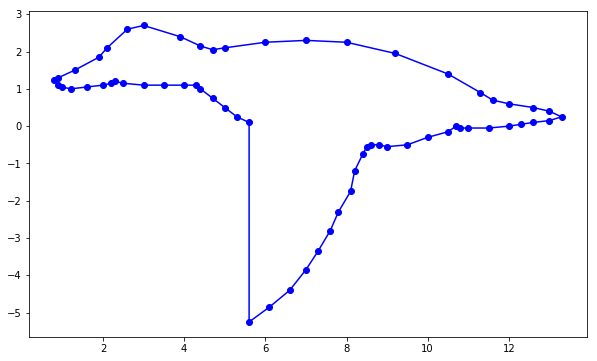

In [12]:
import matplotlib.pyplot as plt
X = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0,
     8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3, 13.0,
     12.6, 12.3, 12.0, 11.5, 11.0, 10.8, 10.7, 10.5, 10.0, 9.5,
     9.0, 8.8, 8.6, 8.5, 8.4, 8.2, 8.1, 7.8, 7.6, 7.3, 7.0, 6.6,
     6.1, 5.6, 5.6, 5.3, 5.0, 4.7, 4.4, 4.3, 4.0, 3.5, 3.0, 2.5,
     2.3, 2.2, 2.0, 1.6, 1.2, 1.0, 0.9, 0.8]
Y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25,
     2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25, 0.15,
     0.1, 0.05, 0.0, -0.05, -0.05, -0.05, 0.0, -0.15, -0.3, -0.5,
     -0.55, -0.5, -0.5, -0.55, -0.75, -1.2, -1.75, -2.3, -2.8, -3.35,
     -3.85, -4.4, -4.85, -5.25, 0.1, 0.25, 0.5, 0.75, 1.0, 1.1, 1.1,
     1.1, 1.1, 1.15, 1.2, 1.15, 1.1, 1.05, 1.0, 1.05, 1.1, 1.25]

fig = plt.figure(figsize=(10, 6))
plt.plot(X, Y, 'b-o')
plt.show()

These points form the closed outline of a bird in flight, creating a complex area to integrate.

As a first estimation at the area, simple integration can be used with linear interpolation between the points.

Polar integration can be used if the origin is moved to a suitable location within the outline. This divides the enclosed area into triangles with a vertex at the origin:

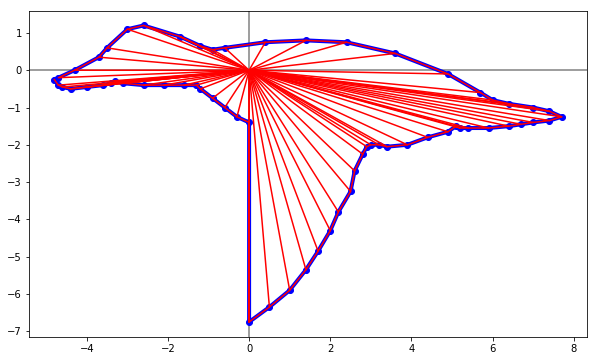

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#Place the origin at (5.6, 1.5)
X_pol = np.array(X)-5.6
Y_pol = np.array(Y)-1.5

fig = plt.figure(figsize=(10, 6))
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.plot(X_pol, Y_pol, 'b-o', lw=4)


for i in range(len(X)-1):
    plt.plot([0, X_pol[i], X_pol[i+1]], [0, Y_pol[i], Y_pol[i+1]], 'r-')
    
plt.show()

The area of individual triangles can be found using Cramer's Rule, with the first point $(x_1, y_1)$ at $(0,0)$.

$
A = \pm \frac{1}{2}
\begin{vmatrix}
    0 & 0  & 1 \\
    x_1 & y_1 & 1 \\
    x_2 & y_2 & 1 \\
\end{vmatrix}
= \pm \frac{1}{2} (x_1 y_2 - x_2 y_1)
$

In [14]:
A = 0
for i in range(len(X)-1):
    A += np.fabs( 0.5*(X_pol[i]*Y_pol[i+1] - X_pol[i+1]*Y_pol[i]) )
print("Area: ", A)

Area:  28.9425


However, this integration technique is only accurate if the points increase or decrease monotonically in angle. If the points are positioned so that the angle changes direction, then regions are created where polar triangles will not give accurate area calculations.

Thus, placement of the origin is important. Ideally, the origin should be placed so that a unique ray can be drawn to every point along the outline (as a light source, the origin is able to illuminate all points along the outline). A different placement of the origin is illustrated below:

Area:  32.6425


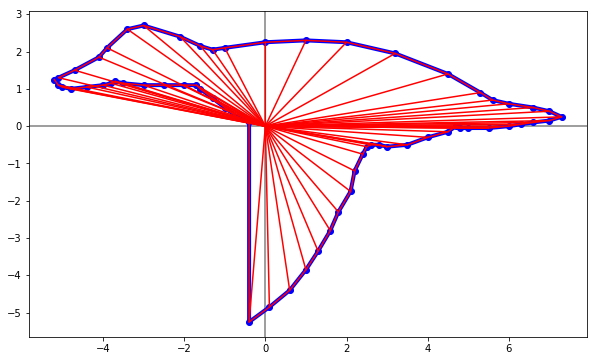

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#Place the origin at (6.0, 0.0)
X_pol = np.array(X)-6.0
Y_pol = np.array(Y)-0.0

fig = plt.figure(figsize=(10, 6))
plt.axhline(y=0, c='gray')
plt.axvline(x=0, c='gray')
plt.plot(X_pol, Y_pol, 'b-o', lw=4)

A = 0
for i in range(len(X)-1):
    A += np.fabs( 0.5*(X_pol[i]*Y_pol[i+1] - X_pol[i+1]*Y_pol[i]) )
    plt.plot([0, X_pol[i], X_pol[i+1]], [0, Y_pol[i], Y_pol[i+1]], 'r-')
    
print("Area: ", A)
plt.show()

Here, the angle of the points reverses near the "head" of the bird outline, resulting in an overestimation of the area.